In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf

In [2]:
x_data = np.linspace(0.0, 10.0, 1000000)
noise = np.random.randn(len(x_data))

In [3]:
x_data

array([0.000000e+00, 1.000001e-05, 2.000002e-05, ..., 9.999980e+00,
       9.999990e+00, 1.000000e+01])

In [4]:
noise.shape

(1000000,)

In [6]:
y_true = (0.5 * x_data) + 5 + noise

In [9]:
x_df = pd.DataFrame(data=x_data, columns=['X Data'])

In [10]:
x_df.head()

,X Data
0,0.00000
1,0.00001
2,0.00002
3,0.00003
4,0.00004


In [11]:
y_df = pd.DataFrame(data=y_true, columns=['Y'])

In [12]:
y_df.head()

,Y
0,4.674521
1,5.264363
2,5.315796
3,3.695879
4,4.275972


In [13]:
data = pd.concat([x_df, y_df], axis=1)

In [15]:
data.head()

,X Data,Y
0,0.00000,4.674521
1,0.00001,5.264363
2,0.00002,5.315796
3,0.00003,3.695879
4,0.00004,4.275972


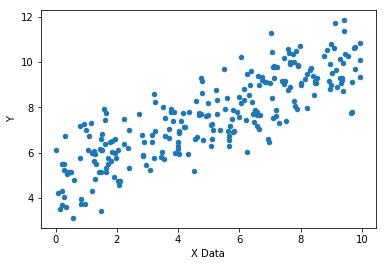

In [17]:
data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')

In [40]:
np.random.randn(2)

array([ 0.84400838, -1.27103502])

In [41]:
batch_size = 8
m = tf.Variable(.84)
b = tf.Variable(.27)

In [42]:
x_ph = tf.placeholder(tf.float32, [batch_size])
y_ph = tf.placeholder(tf.float32, [batch_size])

In [43]:
y_model = m*x_ph + b

In [44]:
err = tf.reduce_sum(tf.square(y_ph-y_model))

In [45]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=.001)
train = optimizer.minimize(err)

In [46]:
init = tf.global_variables_initializer()

In [47]:
with tf.Session() as sess:
    sess.run(init)
    batches = 10000
    
    for i in range(batches):
        rand_ind = np.random.randint(len(x_data), size=batch_size)
        feed = {x_ph: x_data[rand_ind], y_ph: y_true[rand_ind]}
        
        sess.run(train, feed_dict=feed)
    
    model_m, model_b = sess.run([m, b])

In [48]:
model_m

0.4749334

In [49]:
model_b

5.025293

In [50]:
y_hat = x_data * model_m + model_b

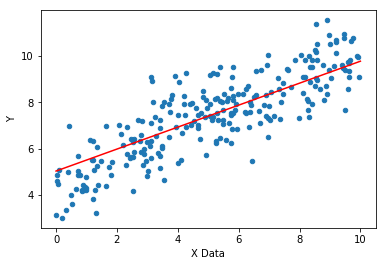

In [51]:
data.sample(250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(x_data, y_hat, 'r')

In [52]:
feat_cols = [tf.feature_column.numeric_column('x', shape=[1])]

In [53]:
estimator = tf.estimator.LinearRegressor(feature_columns=feat_cols)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpaazl3jjd', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x12984d0b8>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [54]:
from sklearn.model_selection import train_test_split

In [55]:
x_train, x_test, y_train, y_test = train_test_split(
    x_data, y_true, test_size=.3, random_state=101)

In [56]:
print(x_train.shape)

(700000,)


In [57]:
print(x_test.shape)

(300000,)


In [61]:
input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train}, y_train, batch_size=8, num_epochs=None, shuffle=True)

In [62]:
train_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_train}, y_train, batch_size=8, num_epochs=1000, shuffle=False)

In [63]:
test_input_func = tf.estimator.inputs.numpy_input_fn(
    {'x': x_test}, y_test, batch_size=8, num_epochs=1000, shuffle=False)

In [64]:
estimator.train(input_fn=input_func, steps=1000)

Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpaazl3jjd/model.ckpt.
INFO:tensorflow:loss = 586.6917, step = 1
INFO:tensorflow:global_step/sec: 893.089
INFO:tensorflow:loss = 18.77342, step = 101 (0.113 sec)
INFO:tensorflow:global_step/sec: 1130.42
INFO:tensorflow:loss = 15.0501175, step = 201 (0.089 sec)
INFO:tensorflow:global_step/sec: 1033.98
INFO:tensorflow:loss = 17.742428, step = 301 (0.096 sec)
INFO:tensorflow:global_step/sec: 1250
INFO:tensorflow:loss 

In [65]:
train_metrics = estimator.evaluate(input_fn=train_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-25-16:27:45
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpaazl3jjd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-25-16:27:46
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0981933, global_step = 1000, label/mean = 7.510584, loss = 8.785546, prediction/mean = 7.3684545
INFO:tensorflow:Saving 'c

In [66]:
test_metrics = estimator.evaluate(input_fn=test_input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2018-10-25-16:28:22
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpaazl3jjd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Evaluation [100/1000]
INFO:tensorflow:Evaluation [200/1000]
INFO:tensorflow:Evaluation [300/1000]
INFO:tensorflow:Evaluation [400/1000]
INFO:tensorflow:Evaluation [500/1000]
INFO:tensorflow:Evaluation [600/1000]
INFO:tensorflow:Evaluation [700/1000]
INFO:tensorflow:Evaluation [800/1000]
INFO:tensorflow:Evaluation [900/1000]
INFO:tensorflow:Evaluation [1000/1000]
INFO:tensorflow:Finished evaluation at 2018-10-25-16:28:23
INFO:tensorflow:Saving dict for global step 1000: average_loss = 1.0986006, global_step = 1000, label/mean = 7.478175, loss = 8.788805, prediction/mean = 7.3467584
INFO:tensorflow:Saving 'c

In [67]:
print('Training Data Metrics')
print(train_metrics)

Training Data Metrics
{'average_loss': 1.0981933, 'label/mean': 7.510584, 'loss': 8.785546, 'prediction/mean': 7.3684545, 'global_step': 1000}


In [68]:
print('Test Data Metrics')
print(test_metrics)

Test Data Metrics
{'average_loss': 1.0986006, 'label/mean': 7.478175, 'loss': 8.788805, 'prediction/mean': 7.3467584, 'global_step': 1000}


In [69]:
new_data = np.linspace(0, 10, 10)
input_func_predict = tf.estimator.inputs.numpy_input_fn({'x': new_data}, shuffle=False)

In [71]:
list(estimator.predict(input_fn=input_func_predict))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpaazl3jjd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'predictions': array([4.364884], dtype=float32)},
 {'predictions': array([5.032044], dtype=float32)},
 {'predictions': array([5.699204], dtype=float32)},
 {'predictions': array([6.366364], dtype=float32)},
 {'predictions': array([7.033524], dtype=float32)},
 {'predictions': array([7.7006836], dtype=float32)},
 {'predictions': array([8.367844], dtype=float32)},
 {'predictions': array([9.035004], dtype=float32)},
 {'predictions': array([9.702164], dtype=float32)},
 {'predictions': array([10.369324], dtype=float32)}]

In [72]:
preds = []

for pred in estimator.predict(input_fn=input_func_predict):
    preds.append(pred['predictions'])

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/vg/y0swt34s3cb8w1ktrb_crlph0000gn/T/tmpaazl3jjd/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


In [73]:
preds

[array([4.364884], dtype=float32),
 array([5.032044], dtype=float32),
 array([5.699204], dtype=float32),
 array([6.366364], dtype=float32),
 array([7.033524], dtype=float32),
 array([7.7006836], dtype=float32),
 array([8.367844], dtype=float32),
 array([9.035004], dtype=float32),
 array([9.702164], dtype=float32),
 array([10.369324], dtype=float32)]

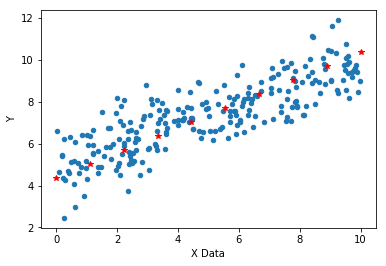

In [76]:
data.sample(n=250).plot(kind='scatter', x='X Data', y='Y')
plt.plot(new_data, preds, 'r*')